In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def feature_engineering_classification(data, dep_var, ind_vars, drop_columns=None, figsize=(10, 5), kind='barplot'):
    """
    Perform classification analysis, including count plots, histograms, heatmaps, and relationship plots
    on dependent and independent variables.

    :param data: DataFrame containing the data to analyze.
    :param dep_var: Column name of the dependent (target) variable.
    :param ind_vars: List of column names for independent variables.
    :param drop_columns: List of columns to drop. Default to None.
    :param figsize: Tuple size for the matplotlib figures. Defaults to (20, 10).
    :param kind: The type of plot for dependent and continuous independent variables. Can be
                 'barplot', 'lineplot', 'boxplot', 'swarmplot', or 'violinplot'. Defaults to 'barplot'.
    """

    if drop_columns:
        try:
            data = data.drop(columns=drop_columns)
        except KeyError as e:
            print(f"Error: {e}. Check if drop_columns contains only valid column names.")
            return

    if dep_var not in data.columns:
        raise ValueError(f"Error: Dependent variable '{dep_var}' not found in dataset.")
        return

    for var in ind_vars:
        if var not in data.columns:
            raise ValueError(f"Error: Independent variable '{var}' not found in dataset.")
            return

    # 1. Distribution check
    
    # Plot the distribution of the dependent variable
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=dep_var)
    plt.title(f"Count Plot of {dep_var}")
    plt.show()
    
    # Plot the distribution of the dependent variable
    for var in ind_vars:
        plt.figure(figsize=figsize)

        try:
            if data[var].dtype == 'object' or data[var].nunique() <= 10:
                sns.countplot(data=data, x=var)
                plt.title(f"Count Plot of {var}")
            else:
                sns.histplot(data=data, x=var, kde=True)
                plt.title(f"Histogram of {var}")

            plt.show()
        except KeyError as e:
            print(f"Error: {e}. Check if '{var}' is a valid column name.")
            return

    # 2. Plots for Checking Relationship between Variables
    for var in ind_vars:
        plt.figure(figsize=figsize)

        try:
            if data[var].dtype == 'object' or data[var].nunique() <= 10:
                ct = pd.crosstab(data[dep_var], data[var])
                sns.heatmap(ct, cmap='coolwarm', annot=True, fmt='.0f')
                plt.title(f"Contingency Table of {dep_var} and {var}")
                plt.show()
                
                for var2 in ind_vars:
                    if var != var2 and (data[var2].dtype == 'object' or data[var2].nunique() <= 10):
                        ct2 = pd.crosstab([data[var], data[var2]], data[dep_var])
                        plt.figure(figsize=figsize)
                        sns.heatmap(ct2, cmap='coolwarm', annot=True, fmt='.0f')
                        plt.title(f"Contingency Table of {dep_var} with {var} and {var2}")
                        plt.show()
            else:
                if kind == 'barplot':
                    sns.barplot(data=data, x=dep_var, y=var, ci=None)
                elif kind == 'lineplot':
                    sns.lineplot(data=data, x=dep_var, y=var)
                elif kind == 'boxplot':
                    sns.boxplot(data=data, x=dep_var, y=var)
                elif kind == 'swarmplot':
                    sns.swarmplot(data=data, x=dep_var, y=var)
                elif kind == 'violinplot':
                    sns.violinplot(data=data, x=dep_var, y=var)
                plt.title(f"{kind.capitalize()} of {dep_var} and {var}")

                plt.show()
                
        except KeyError as e:
            print(f"Error: {e}. Check if '{var}' is a valid column name.")
            return

    # Heat maps (with correlation table)
    plt.figure(figsize=figsize)
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title(f"Correlation Heatmap")
    plt.show()




In [43]:
# Without three way contigency tables

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def feature_engineering_classification(data, dep_var, num_ind_vars, cat_ind_vars, figsize=(10, 5), kind='barplot'):
    """
    Perform classification analysis, including count plots, histograms, heatmaps, and relationship plots
    on dependent and independent variables.

    :param data: DataFrame containing the data to analyze.
    :param dep_var: Column name of the dependent (target) variable.
    :param num_ind_vars: List of column names for numeric independent variables.
    :param cat_ind_vars: List of column names for categorical independent variables.
    :param figsize: Tuple size for the matplotlib figures. Defaults to (20, 10).
    :param kind: The type of plot for dependent and continuous independent variables. Can be
                 'barplot', 'lineplot', 'boxplot', 'swarmplot', or 'violinplot'. Defaults to 'barplot'.
    """
    if dep_var not in data.columns:
        raise ValueError(f"Error: Dependent variable '{dep_var}' not found in dataset.")
        return

    for var in num_ind_vars + cat_ind_vars:
        if var not in data.columns:
            raise ValueError(f"Error: Independent variable '{var}' not found in dataset.")
            return

    # 1. Distribution Check
    
    # Plot the distribution of the dependent variable
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=dep_var)
    plt.title(f"Count Plot of {dep_var}")
    plt.show()
    
    # Plot the distribution of the independent variables
    for var in num_ind_vars + cat_ind_vars:
        plt.figure(figsize=figsize)

        try:
            if var in cat_ind_vars:
                sns.countplot(data=data, x=var)
                plt.title(f"Count Plot of {var}")
            else:
                sns.histplot(data=data, x=var, kde=True)
                plt.title(f"Histogram of {var}")

            plt.show()
        except KeyError as e:
            print(f"Error: {e}. Check if '{var}' is a valid column name.")
            return

    # 2. Plots for Checking Relationship between Variables
    for var in num_ind_vars + cat_ind_vars:
        plt.figure(figsize=figsize)

        try:
            if var in cat_ind_vars:
                ct = pd.crosstab(data[dep_var], data[var])
                sns.heatmap(ct, cmap='coolwarm', annot=True, fmt='.0f')
                plt.title(f"Contingency Table of {dep_var} and {var}")
                plt.show()
                
            else:
                if kind == 'barplot':
                    sns.barplot(data=data, x=dep_var, y=var, ci=None)
                elif kind == 'lineplot':
                    sns.lineplot(data=data, x=dep_var, y=var)
                elif kind == 'boxplot':
                    sns.boxplot(data=data, x=dep_var, y=var)
                elif kind == 'swarmplot':
                    sns.swarmplot(data=data, x=dep_var, y=var)
                elif kind == 'violinplot':
                    sns.violinplot(data=data, x=dep_var, y=var)
                plt.title(f"{kind.capitalize()} of {dep_var} and {var}")

                plt.show()
                
        except KeyError as e:
            print(f"Error: {e}. Check if '{var}' is a valid column name.")
            return

    # Heat maps (with correlation table)
    # Only for numeric variables
    plt.figure(figsize=figsize)
    correlation_matrix = data[num_ind_vars + [dep_var]].corr()
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title(f"Correlation Heatmap")
    plt.show()

In [3]:
df = pd.read_csv('/home/young78703/Data_Science_Project/data/melb_data.csv')
df.rename(columns={'Longtitude':'Longitude'},inplace=True)

import pandas as pd
import numpy as np

def impute_nulls(df):
    """
    Impute null values in a Pandas DataFrame based on the data type of each column.
    - For float columns, impute with the mean.
    - For integer columns, impute with the median.
    - For object columns, impute with the mode.
    - For datetime columns, impute with the most recent or most frequent date.
    - For timedelta columns, impute with the mode.
    - For bool columns, impute with the mode.
    - For category columns, impute with the mode.
    - For complex columns, impute with the mean.
    """
    # Get data types of all columns
    dtypes = df.dtypes

    # Iterate over all columns
    for col in df.columns:
        # Check if column contains null values
        if df[col].isnull().sum() > 0:
            # Get data type of column
            dtype = dtypes[col]
            # Impute null values based on data type
            if dtype == 'float64' or dtype == 'float32' or dtype == 'float16':
                df[col].fillna(df[col].mean(), inplace=True)
            elif dtype == 'int64' or dtype == 'int32' or dtype == 'int16' or dtype == 'int8':
                df[col].fillna(df[col].median(), inplace=True)
            elif dtype == 'object':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype == 'datetime64':
                df[col].fillna(method='bfill', inplace=True)
            elif dtype == 'timedelta64':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype == 'bool':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype.name == 'category':
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif dtype == 'complex64' or dtype == 'complex128':
                df[col].fillna(df[col].mean(), inplace=True)
    return df

impute_nulls(df)

from scipy import stats

def drop_outliers_by_zscores(data, column, lower_zscore, upper_zscore, inplace=False):
    """
    Drops rows from a Pandas DataFrame based on z-scores of a given column.

    Parameters:
    data (pandas.DataFrame): The input data.
    column (str): The name of the column to use for computing z-scores.
    lower_zscore (float): The lower z-score boundary.
    upper_zscore (float): The upper z-score boundary.
    inplace (bool): If True, updates the DataFrame directly. If False, returns a new DataFrame with outliers dropped.

    Returns:
    pandas.DataFrame or None: The modified DataFrame with outliers dropped, if inplace is False;
                              None, if inplace is True.
    """
    # Check input arguments
    if column not in data.columns:
        raise ValueError("Column '%s' not found in data." % column)
    if not np.isfinite(lower_zscore):
        raise ValueError("Lower z-score boundary must be finite.")
    if not np.isfinite(upper_zscore):
        raise ValueError("Upper z-score boundary must be finite.")

    # Compute z-scores
    z_scores = pd.Series(stats.zscore(data[column]), index=data.index)

    # Drop outliers outside boundaries
    mask = (z_scores >= upper_zscore) | (z_scores <= lower_zscore)
    
    if inplace:
        data.drop(data[mask].index, inplace=True)
        return None
    else:
        return data.loc[~mask]

drop_outliers_by_zscores(df, 'Price', -3.5, 3.5, inplace=True)

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from typing import Optional

def encode_categorical_column(data: pd.DataFrame, column: str, mapping: Optional[dict] = None) -> pd.DataFrame:
    """
    Encode a categorical column in the input dataframe using LabelEncoder or mapping.

    :param data: input dataframe
    :param column: column name to be encoded
    :param mapping: optional dictionary defining the mapping for ordinal variables; defaults to None
    :return: dataframe with the specified column encoded
    """
    data = data.copy()

    if mapping is not None:
        # Use mapping for ordinal categorical variables
        data[column] = data[column].map(mapping)
    else:
        # Use LabelEncoder for nominal categorical variables
        encoder = LabelEncoder()
        encoded = encoder.fit_transform(data[column])
        data[column] = encoded

    return data

encode_categorical_column(df, 'Method')
encode_categorical_column(df, 'Type')


 


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,0,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,0,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,0,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,0,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,0,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,0,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,151.96765,1981.000000,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,0,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.00000,1995.000000,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,0,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,151.96765,1997.000000,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,0,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.00000,1920.000000,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0


In [36]:
# improved version

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

def agglomerative_clustering_geological_data(data, drop_columns, n_clusters=None, figsize=(15, 12), dot_size=20,
                                            hue='Cluster', col=None, style=None, size=None, palette='coolwarm',
                                            alpha=1, x_feature='Longitude', y_feature='Latitude', sizes=(2, 200)):
    """
    Perform Agglomerative Clustering on geological data and visualize the results.

    :param data: DataFrame - The input data containing features.
    :param drop_columns: List of str - Columns to drop from the data before performing clustering.
    :param n_clusters: int, optional - The number of clusters for Agglomerative Clustering. If None, the optimal number of clusters will be determined using the dendrogram.
    :param figsize: tuple, optional - The figure size of the plot.
    :param dot_size: int, optional - The size of the dots in the plot.
    :param hue: str, optional - The hue (color) parameter for seaborn plots.
    :param col: str, optional - The col (column) parameter for seaborn FacetGrid plots.
    :param style: str, optional - The style parameter for seaborn scatterplot.
    :param size: str, optional - The size parameter for seaborn scatterplot.
    :param palette: str, optional - The color palette for seaborn plots.
    :param alpha: float, optional - The alpha parameter for seaborn plots.
    :param x_feature: str, optional - The x-axis feature in the plot.
    :param y_feature: str, optional - The  y-axis feature in the plot.
    :param sizes: tuple, optional - The sizes parameter for seaborn scatterplot.

    :return: DataFrame - The input data with an additional 'Cluster' column representing the cluster labels.
    """
    try:
        # Create a copy of the input data and drop the specified columns
        original_data = data.copy()
        X = data.drop(columns=drop_columns)
        
        # Standardize the remaining features using StandardScaler
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # If the number of clusters is not provided, determine the optimal number using the dendrogram
        if n_clusters is None:
            plt.figure(figsize=figsize)
            plt.title('Dendrogram')
            plt.xlabel('Data Points')
            plt.ylabel('Euclidean Distance')
            Z = linkage(X_scaled, method='ward')
            dendrogram(Z)
            plt.show()

            n_clusters = int(input("Enter the optimal number of clusters based on the dendrogram: "))
        
        # Perform Agglomerative Clustering with the determined number of clusters    
        hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
        cluster_labels = hc.fit_predict(X_scaled)
        
        # Add the cluster labels to the original data
        original_data['Cluster'] = cluster_labels.astype('object')

        # Visualize the clustered data using seaborn
        if col is not None:
            g = sns.FacetGrid(original_data, col=col, height=figsize[1]/X[col].nunique(), aspect=figsize[0]/figsize[1])
            g.map_dataframe(sns.scatterplot, x=x_feature, y=y_feature, hue=hue, size=size, style=style, alpha=alpha, palette=palette, s=dot_size)
            g.set_titles('{col_name}')
            g.add_legend(title=original_data[col].name)
        else:
            plt.figure(figsize=figsize)
            sns.scatterplot(x=x_feature, y=y_feature, data=original_data, hue=hue, size=size, style=style, alpha=alpha, palette=palette, s=dot_size)
            plt.title('Clusters')
            plt.xlabel(x_feature)
            plt.ylabel(y_feature)
            plt.legend()
            plt.show()
        
        return original_data
        
    except Exception as e:
        print(f"Error: {e}")
        return None


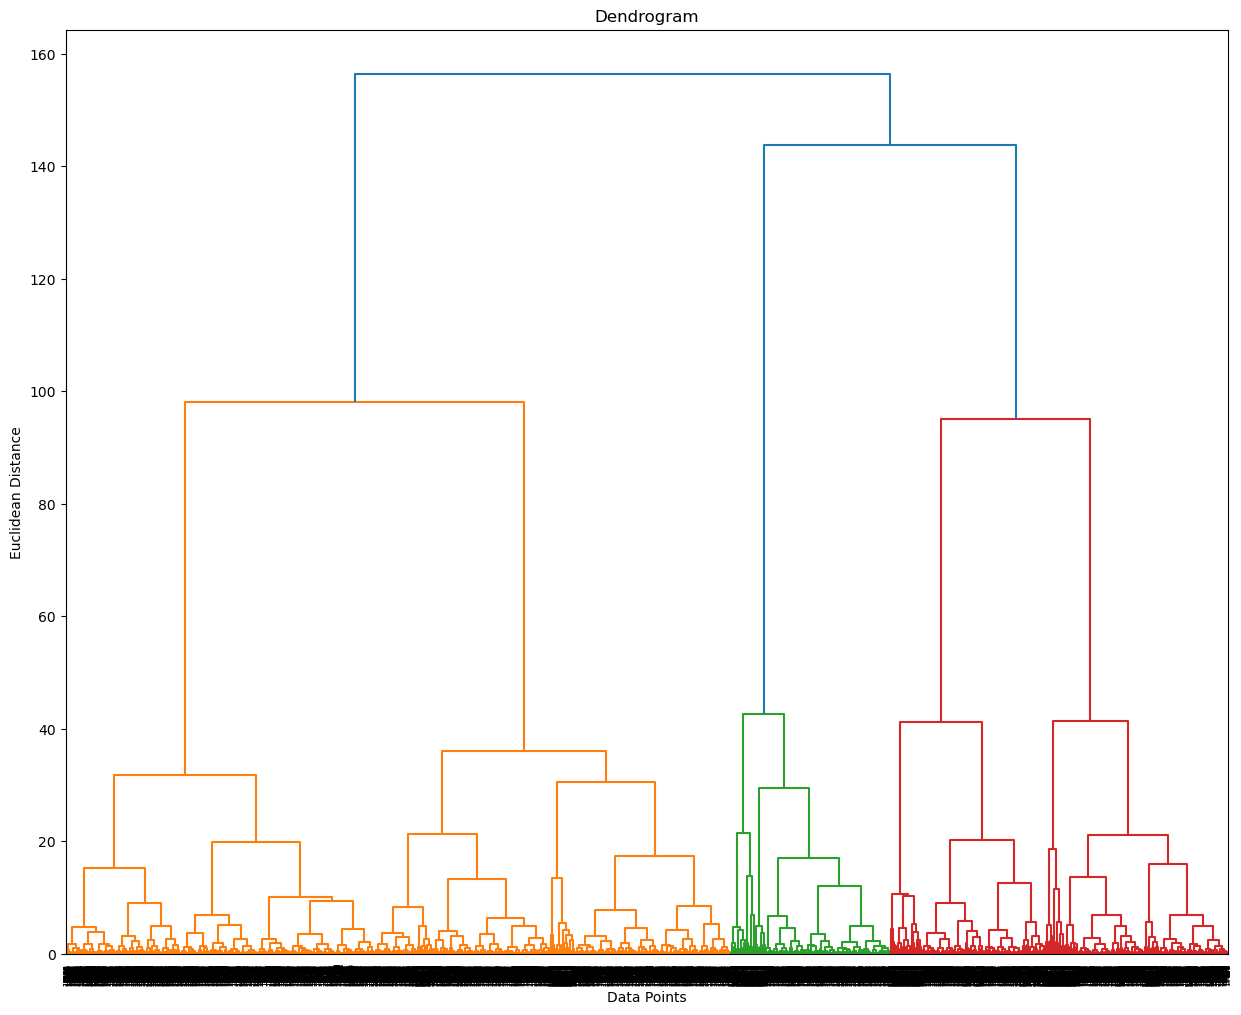

Enter the optimal number of clusters based on the dendrogram: 5


/home/young78703/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


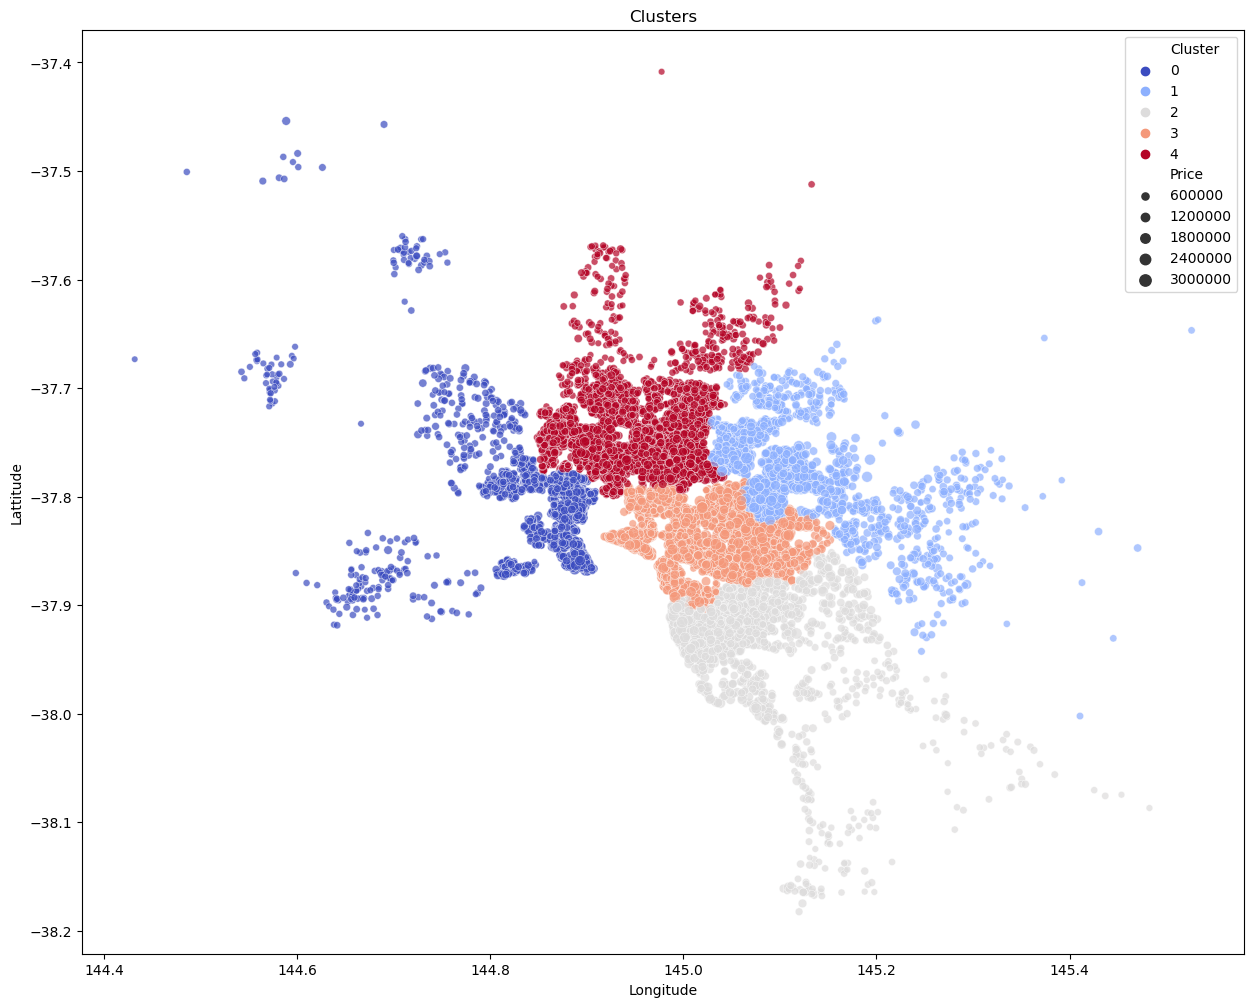

In [37]:
drop_columns=['Suburb', 'Address','Type','Rooms', 'Method', 'SellerG', 'Date', 'Bedroom2', 'Distance', 'Postcode', 'Price', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname', 'Propertycount']
df = agglomerative_clustering_geological_data(df, drop_columns, n_clusters=None, figsize=(15, 12), dot_size=30, hue='Cluster', palette='coolwarm', size='Price', sizes=(1,500), alpha=0.7, x_feature='Longitude', y_feature='Lattitude')


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13439 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13439 non-null  object 
 1   Address        13439 non-null  object 
 2   Rooms          13439 non-null  int64  
 3   Type           13439 non-null  object 
 4   Price          13439 non-null  float64
 5   Method         13439 non-null  object 
 6   SellerG        13439 non-null  object 
 7   Date           13439 non-null  object 
 8   Distance       13439 non-null  float64
 9   Postcode       13439 non-null  float64
 10  Bedroom2       13439 non-null  float64
 11  Bathroom       13439 non-null  float64
 12  Car            13439 non-null  float64
 13  Landsize       13439 non-null  float64
 14  BuildingArea   13439 non-null  float64
 15  YearBuilt      13439 non-null  float64
 16  CouncilArea    13439 non-null  object 
 17  Lattitude      13439 non-null  float64
 18  Longit

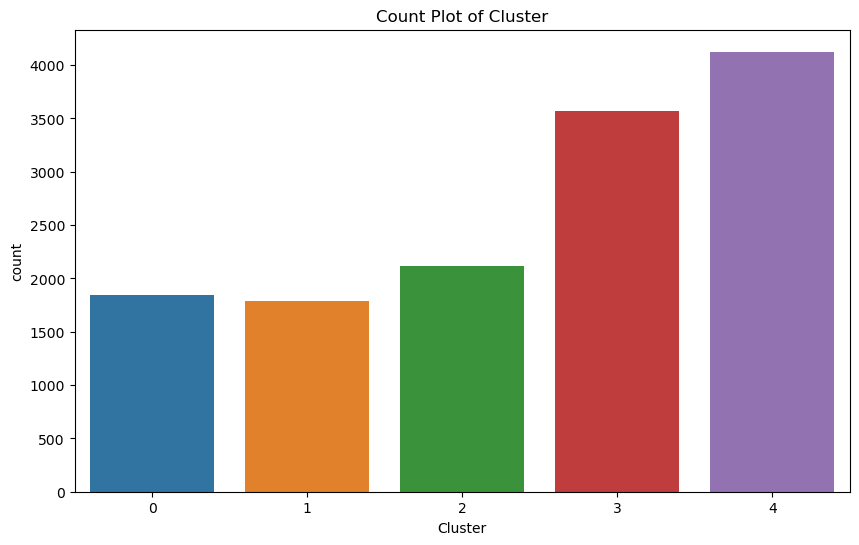

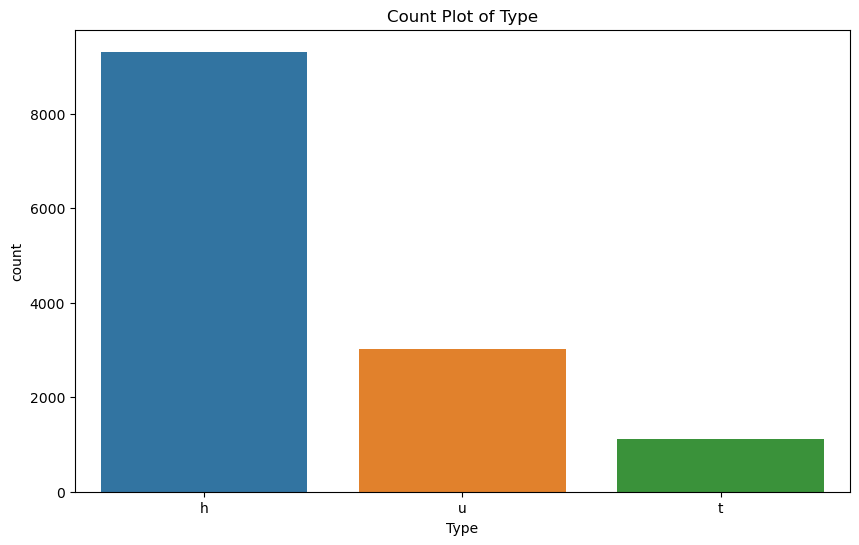

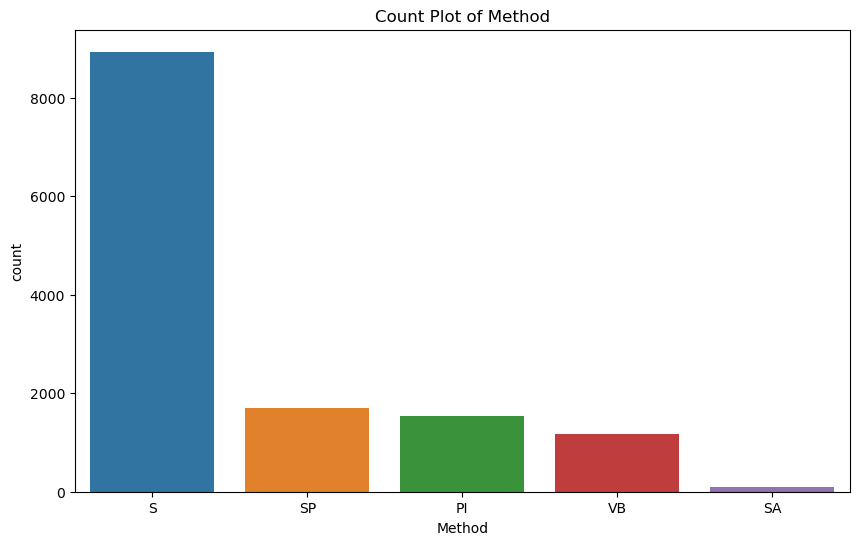

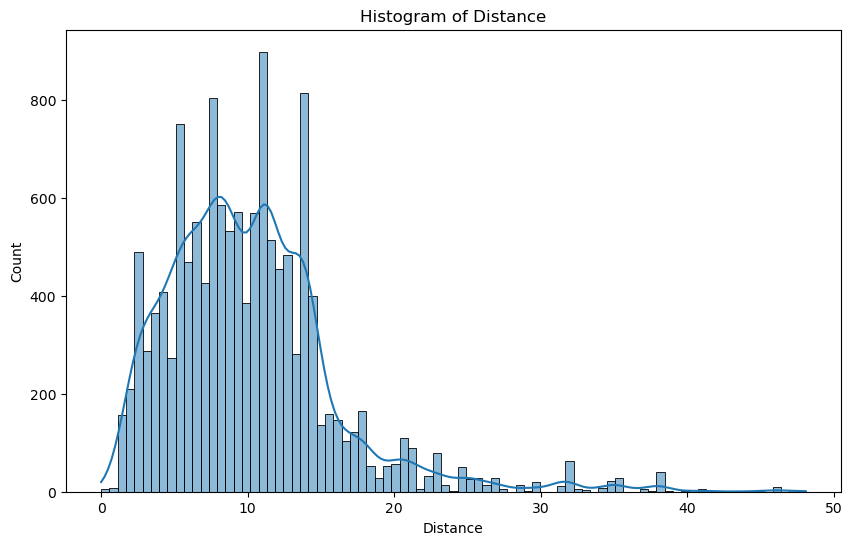

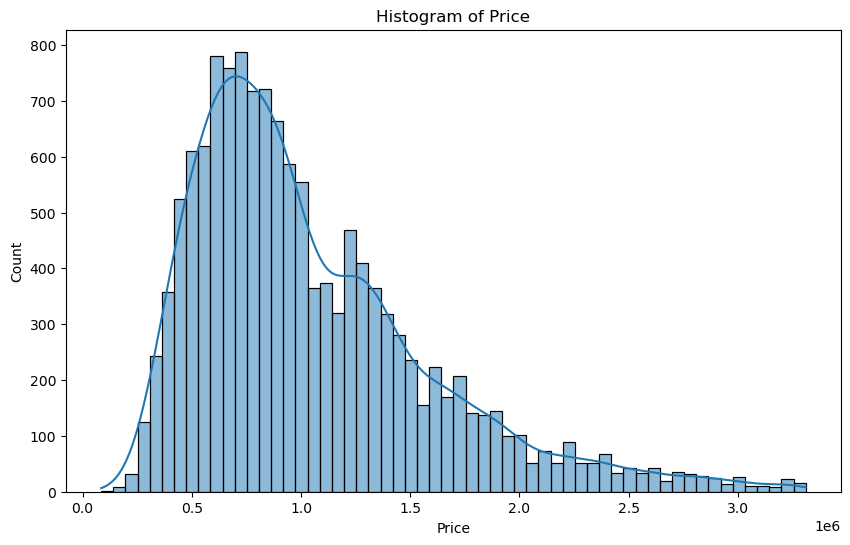

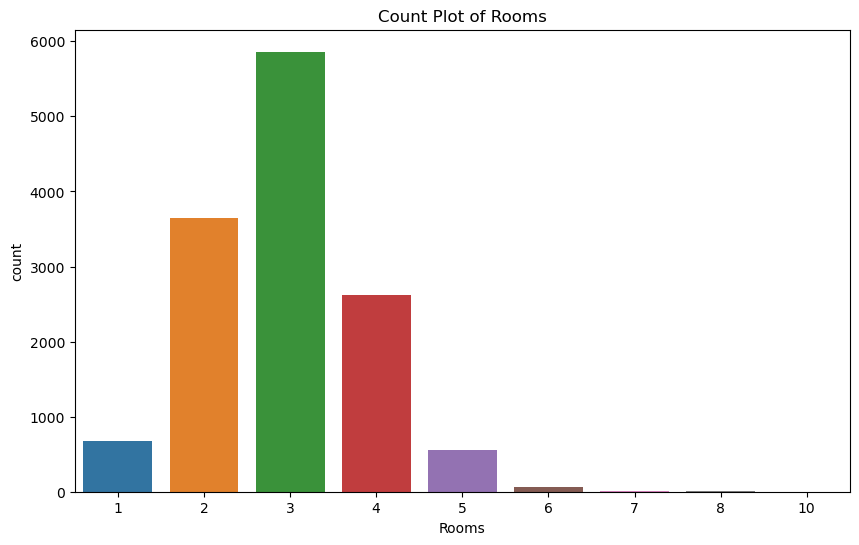

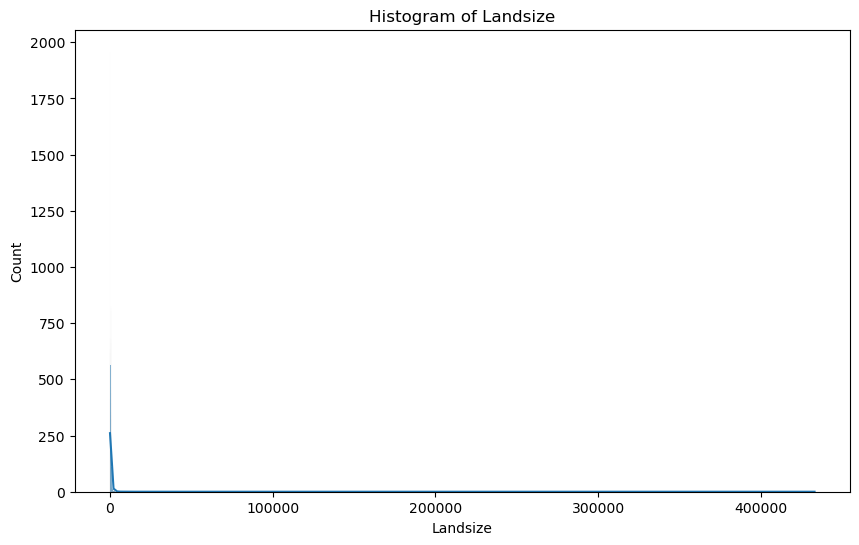

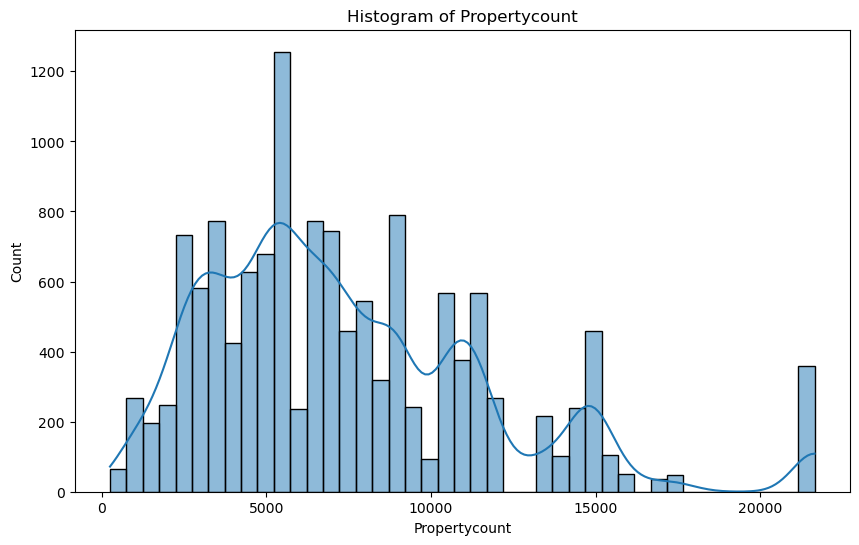

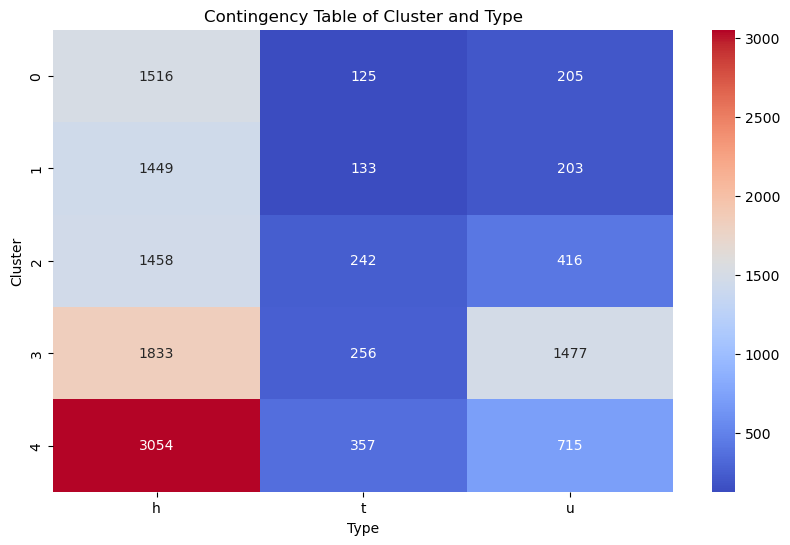

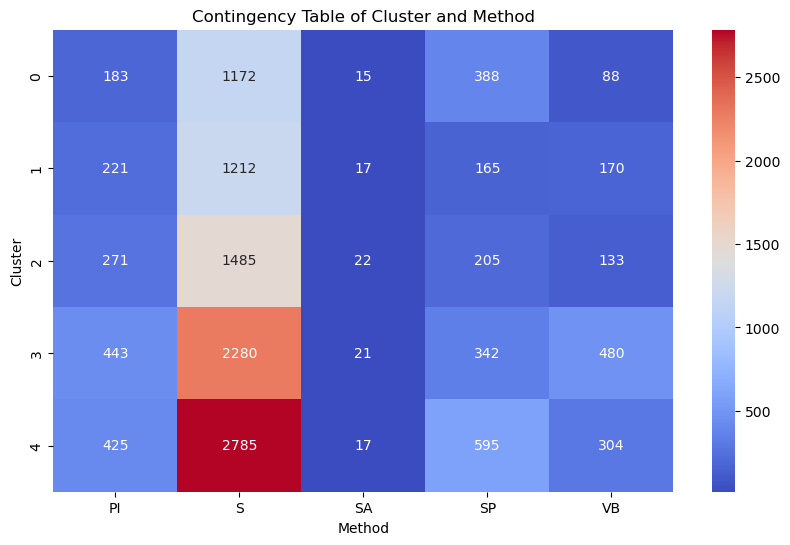

/tmp/ipykernel_20448/3532981530.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=dep_var, y=var, ci=None)


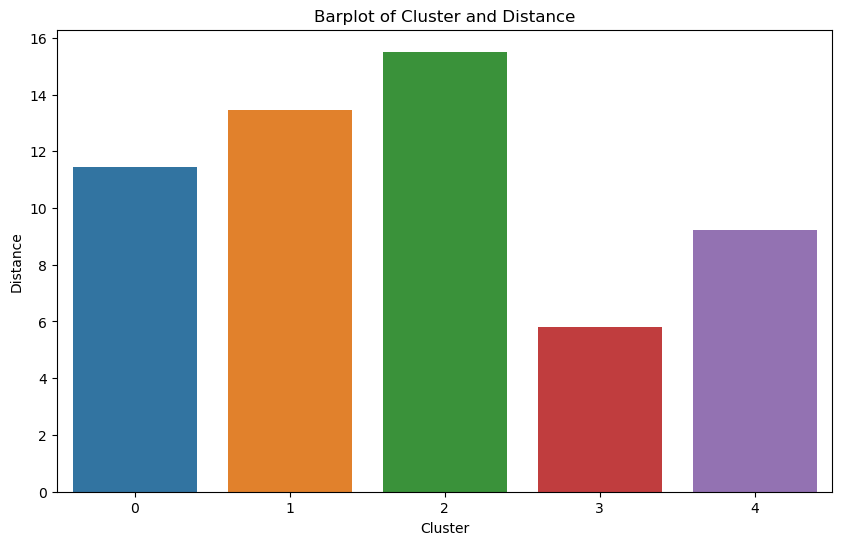

/tmp/ipykernel_20448/3532981530.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=dep_var, y=var, ci=None)


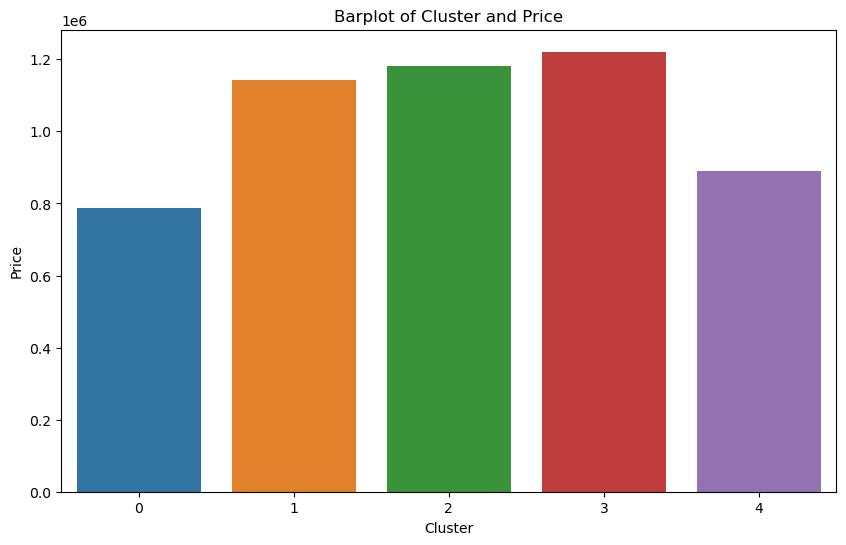

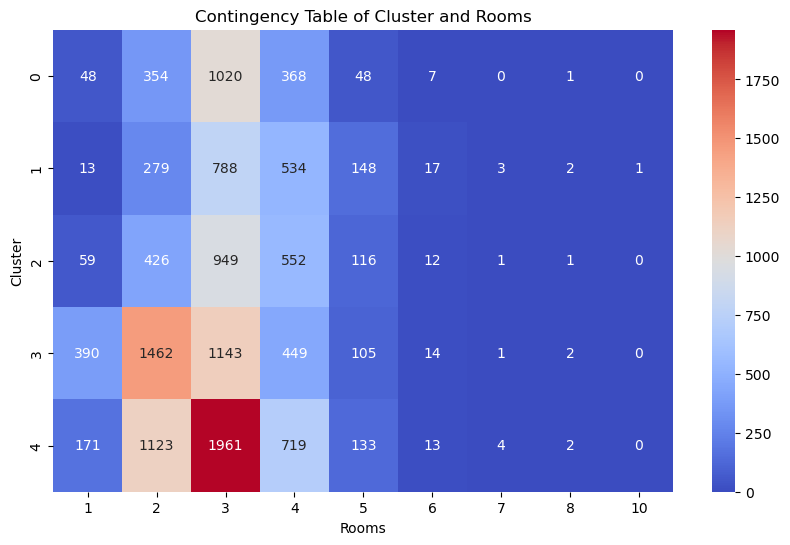

/tmp/ipykernel_20448/3532981530.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=dep_var, y=var, ci=None)


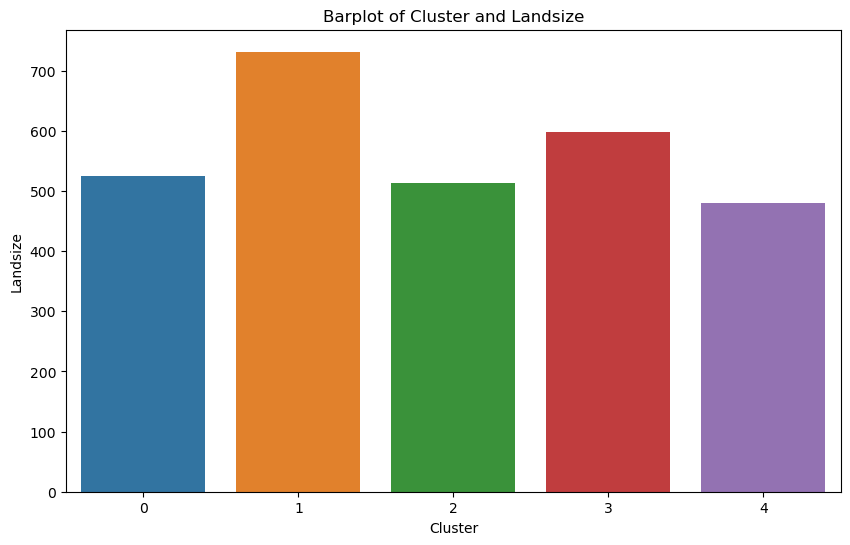

/tmp/ipykernel_20448/3532981530.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=dep_var, y=var, ci=None)


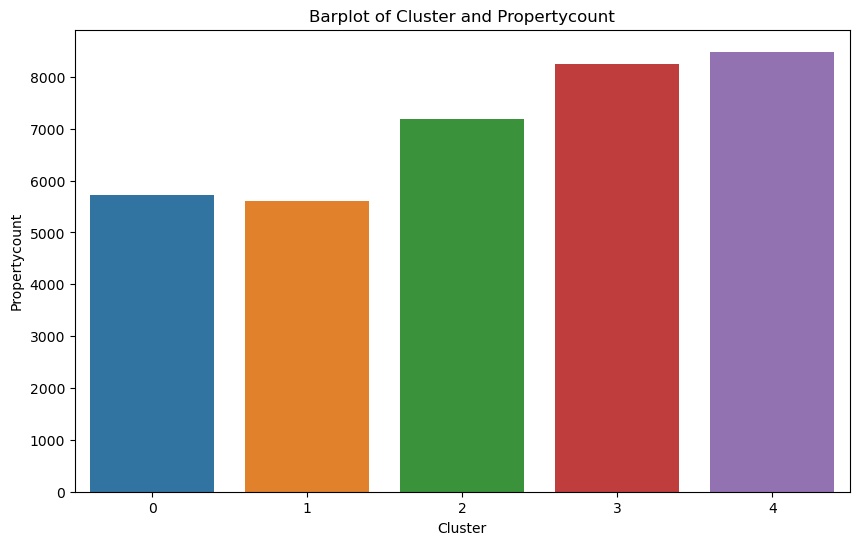

/tmp/ipykernel_20448/3532981530.py:94: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


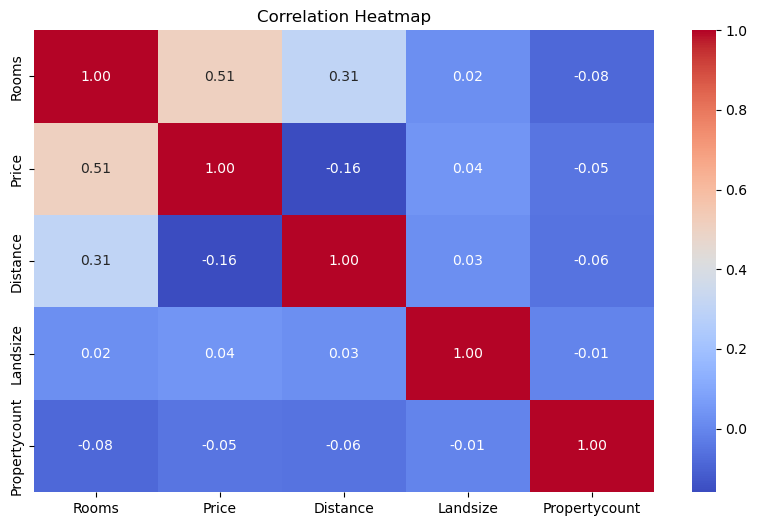

In [39]:
# Example usage

dep_var = 'Cluster'
ind_vars = ['Type', 'Method', 'Distance', 'Price', 'Rooms', 'Landsize', 'Propertycount']
drop_columns = ['Suburb', 'Address', 'SellerG', 'Date', 'Bedroom2','Car', 'Postcode','YearBuilt', 'Car', 'Bathroom', 'BuildingArea', 'CouncilArea', 'Regionname', 'Lattitude', 'Longitude' ]
figsize = (10, 6)

feature_engineering_classification(df, dep_var, ind_vars, drop_columns, figsize)

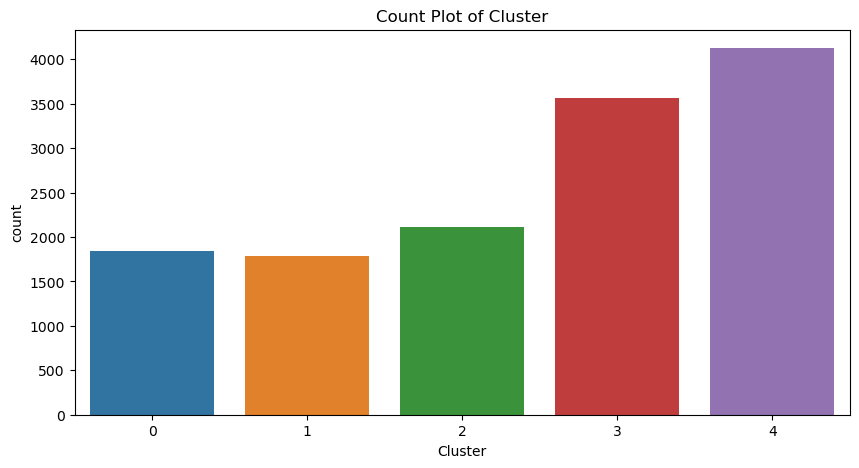

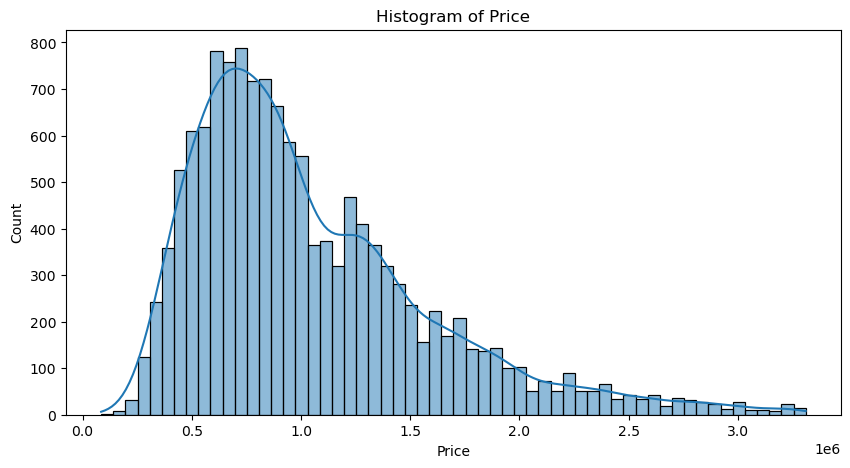

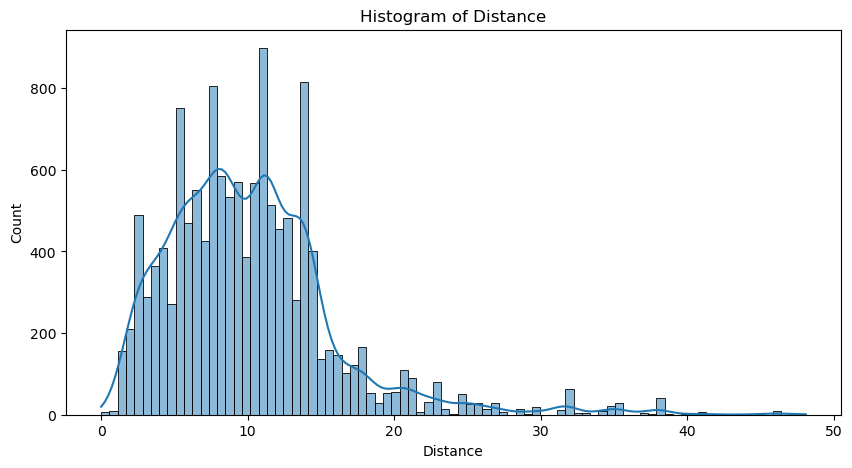

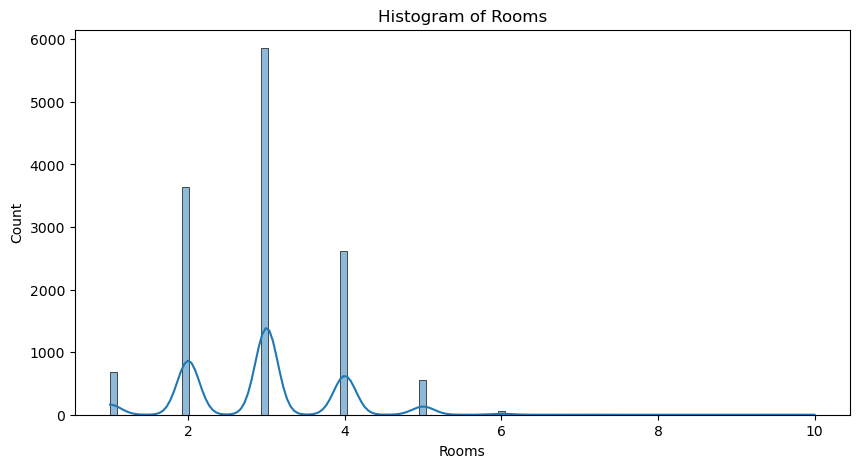

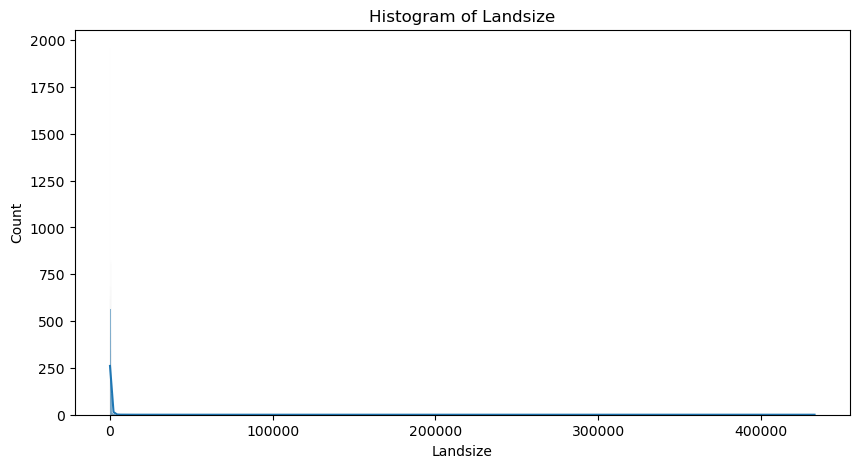

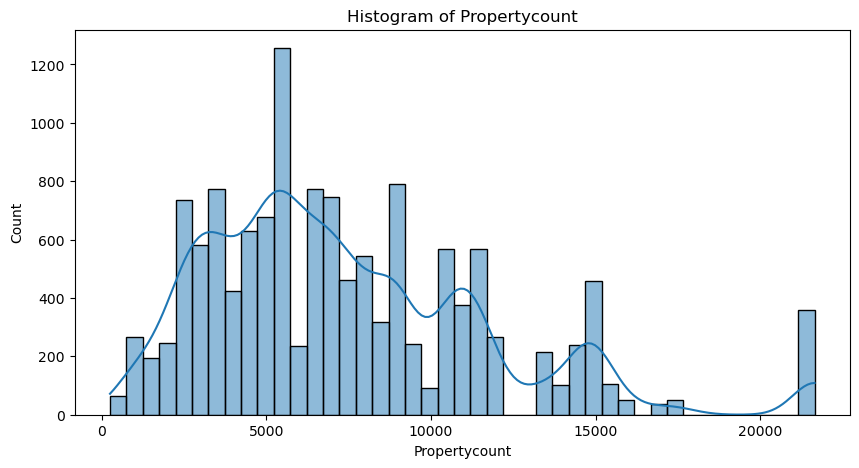

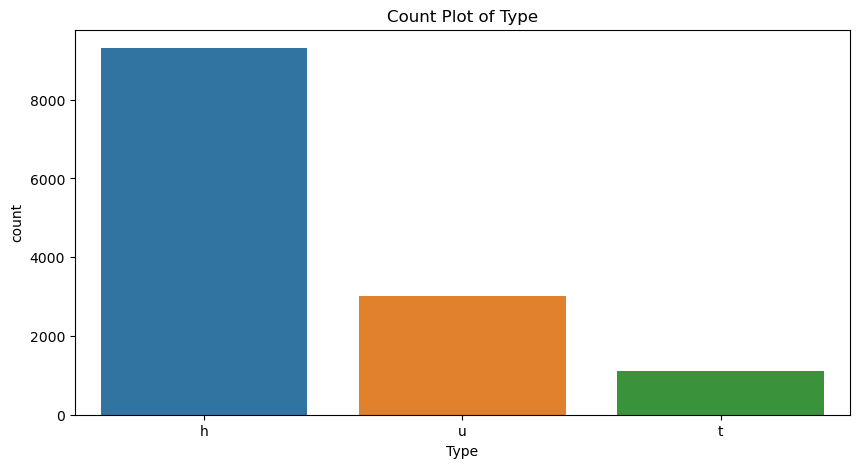

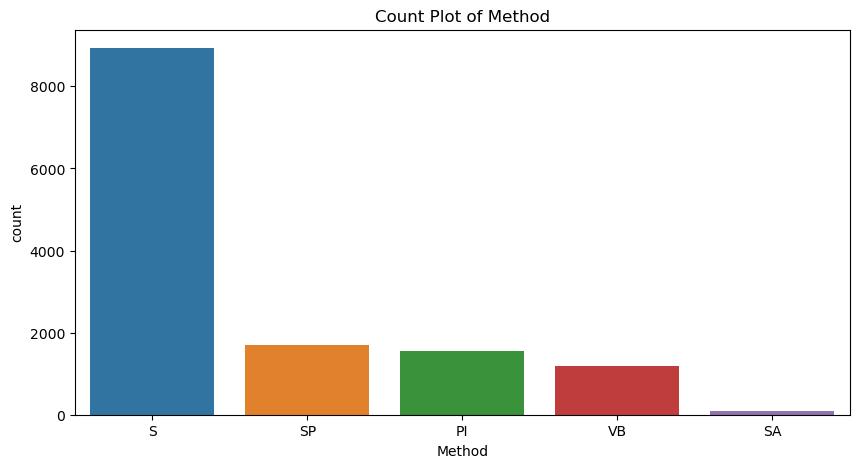

/tmp/ipykernel_20448/4235233353.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=dep_var, y=var, ci=None)


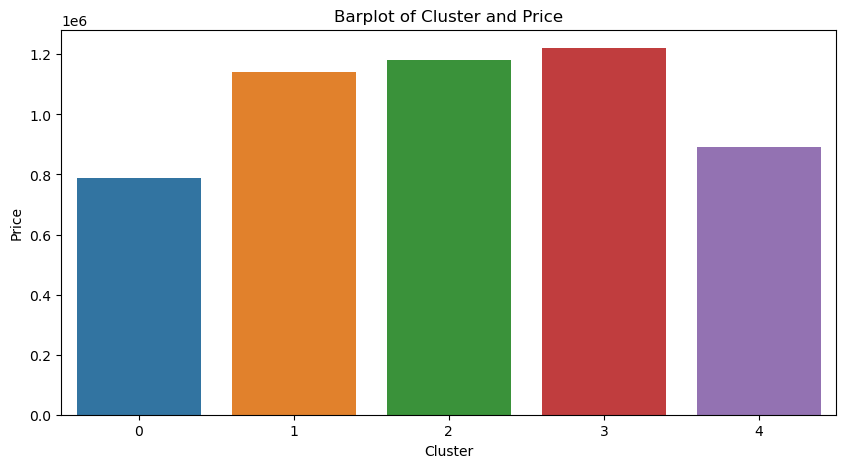

/tmp/ipykernel_20448/4235233353.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=dep_var, y=var, ci=None)


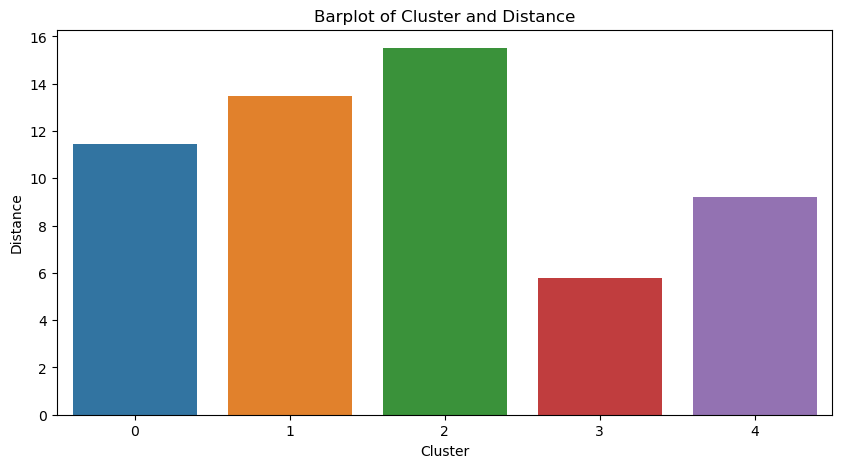

/tmp/ipykernel_20448/4235233353.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=dep_var, y=var, ci=None)


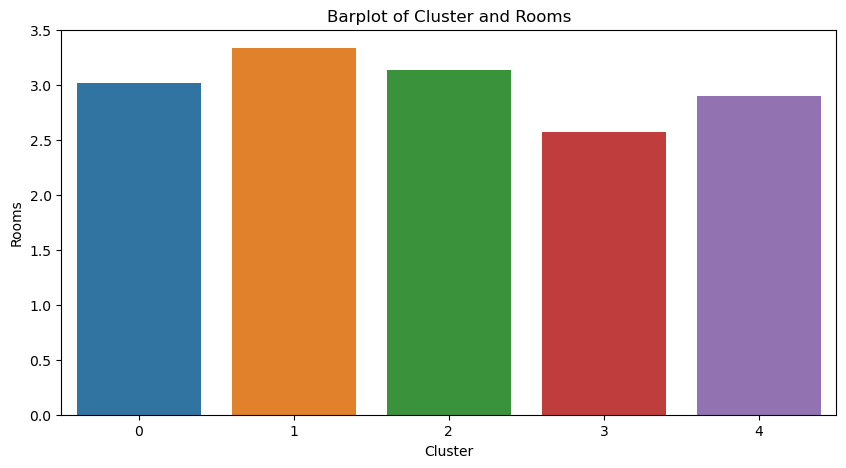

/tmp/ipykernel_20448/4235233353.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=dep_var, y=var, ci=None)


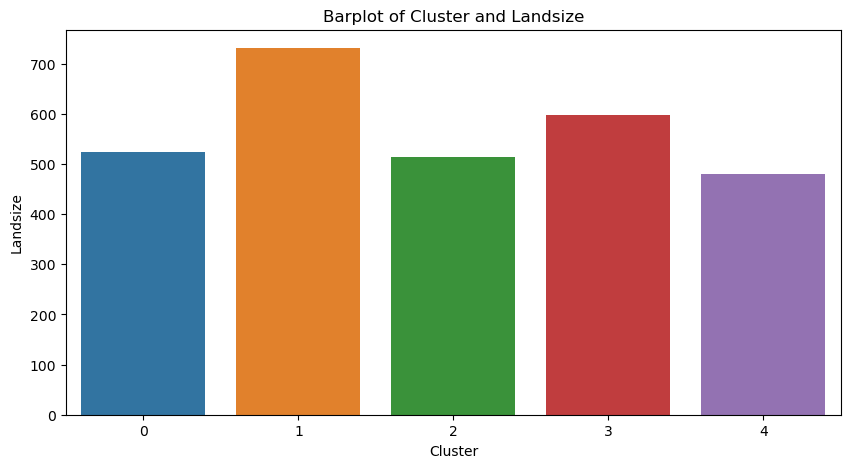

/tmp/ipykernel_20448/4235233353.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=dep_var, y=var, ci=None)


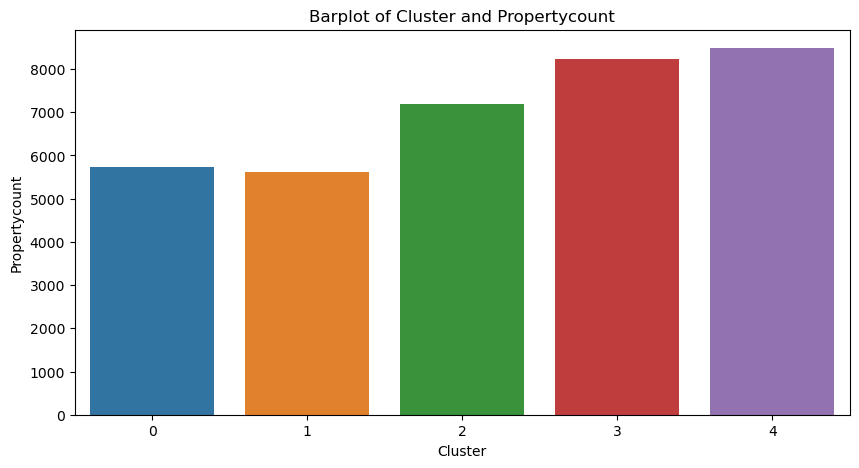

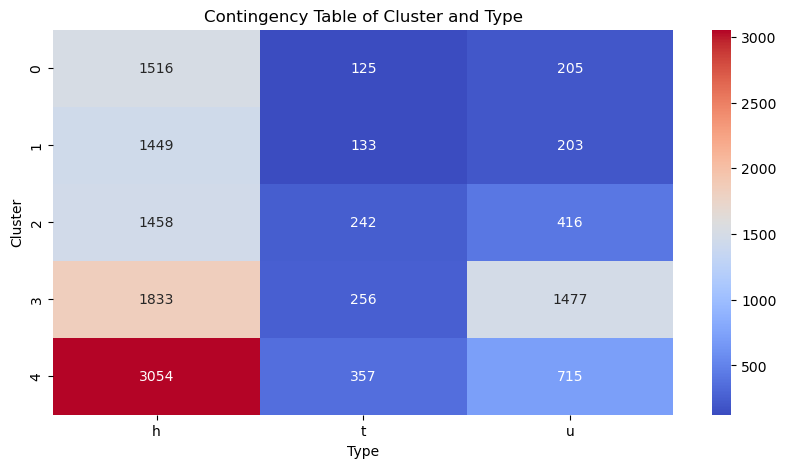

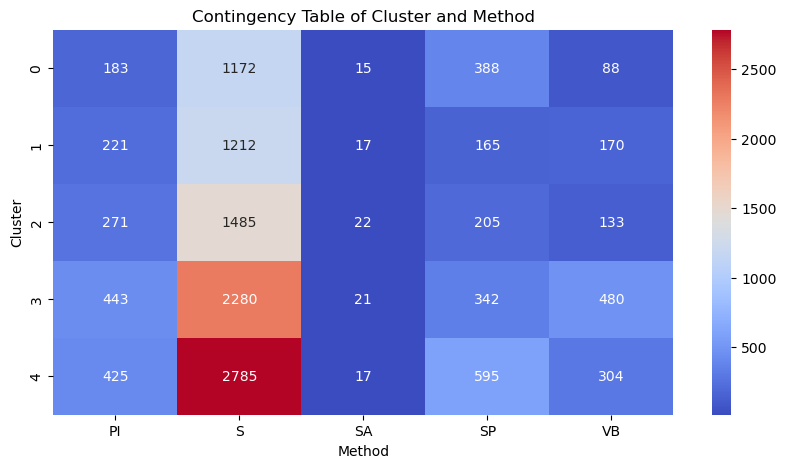

/tmp/ipykernel_20448/4235233353.py:87: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[num_ind_vars + [dep_var]].corr()


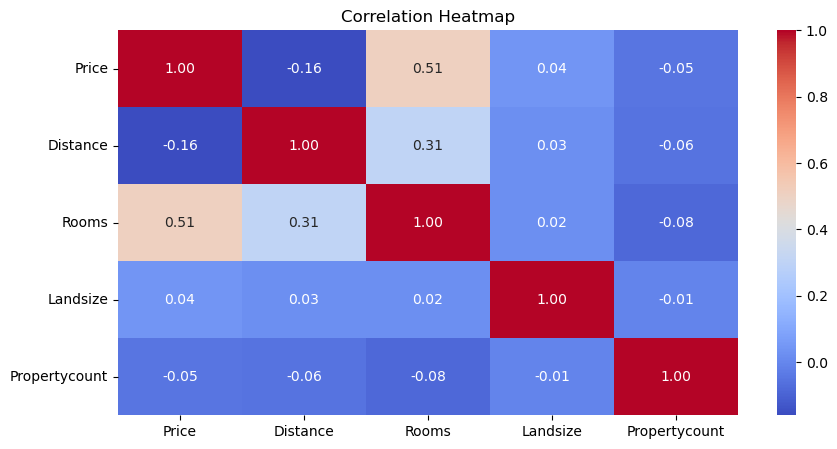

In [46]:
# Example usage

dep_var = 'Cluster'
num_ind_vars =['Price','Distance', 'Rooms', 'Landsize', 'Propertycount']
cat_ind_vars =['Type','Method',]
drop_columns = ['Suburb', 'Address', 'SellerG', 'Date', 'Bedroom2','Car', 'Postcode','YearBuilt', 'Car', 'Bathroom', 'BuildingArea', 'CouncilArea', 'Regionname', 'Lattitude', 'Longitude' ]

feature_engineering_classification(df, dep_var, num_ind_vars, cat_ind_vars)
